### Model Training 
##### 1.1 Import all requirements libraries

In [24]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

#### Import teh data.csv using the pandas readcsv

In [2]:
df = pd.read_csv('../data/data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Prepare X and Y
X =df.drop(columns=['math_score'],axis=1)

y =df['math_score']

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print(f"{df['gender'].nunique()} categories in the Gender {df['gender'].unique()}")

2 categories in the Gender ['female' 'male']


In [12]:
#check the uniqueness in each column of categorical columns
cat_column =df.select_dtypes(include='object').columns
for col in cat_column:
    print(f"{df[col].nunique()} categories in the {col} {df[col].unique()}")

2 categories in the gender ['female' 'male']
5 categories in the race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
6 categories in the parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
2 categories in the lunch ['standard' 'free/reduced']
2 categories in the test_preparation_course ['none' 'completed']


In [13]:
numerical_colums= X.select_dtypes(exclude ='object').columns
numerical_colums

Index(['reading_score', 'writing_score'], dtype='object')

In [14]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ohe =OneHotEncoder()
stdsclr =StandardScaler()
processor = ColumnTransformer(
    [
        ('OneHotEncoder',ohe,cat_column),
        ('StandardScaler',stdsclr ,numerical_colums),
    ]
)

In [15]:
X =processor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [20]:
print(X)

[[ 1.          0.          0.         ...  1.          0.19399858
   0.39149181]
 [ 1.          0.          0.         ...  0.          1.42747598
   1.31326868]
 [ 1.          0.          0.         ...  1.          1.77010859
   1.64247471]
 ...
 [ 1.          0.          0.         ...  0.          0.12547206
  -0.20107904]
 [ 1.          0.          0.         ...  0.          0.60515772
   0.58901542]
 [ 1.          0.          0.         ...  1.          1.15336989
   1.18158627]]


In [23]:
#split the data into  train and test dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=42,test_size=0.2,)
x_train.shape, x_test.shape,

((800, 19), (200, 19))

In [34]:
#Matrices function to check errors
def metrics_evaluate(true, predicted):
    mse =mean_squared_error(true, predicted)
    mae =mean_absolute_error(true, predicted)
    r_2 =r2_score(true, predicted)
    rmse =np.sqrt(mean_squared_error(true,predicted))
    return mae, rmse, r_2


In [35]:
models ={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Decision Tree ": DecisionTreeRegressor(),
    "Random Forset": RandomForestRegressor(),
    "SVR":SVR(),
    "K-Neighbors Resgressor": KNeighborsRegressor(),
    "XGBoost Regression" : XGBRegressor(),
    "CatBoost Regression": CatBoostRegressor(),
    "AdaBoost Regression": AdaBoostRegressor(),
    
}
model_list =[]
r2_list =[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(x_train,y_train)

    #make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)


    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = metrics_evaluate(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = metrics_evaluate(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Decision Tree 
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
------------------------------

c:\Users\Rahish\anaconda3\envs\envs\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Rahish\anaconda3\envs\envs\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Rahish\anaconda3\envs\envs\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Rahish\anaconda3\envs\envs\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Rahish\anaconda3\envs\envs\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executabl

K-Neighbors Resgressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2494
- Mean Absolute Error: 5.6090
- R2 Score: 0.7840


XGBoost Regression
Model performance for Training set
- Root Mean Squared Error: 0.9087
- Mean Absolute Error: 0.6148
- R2 Score: 0.9963
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5889
- Mean Absolute Error: 5.0844
- R2 Score: 0.8216


Learning rate set to 0.039525
0:	learn: 14.5987177	total: 157ms	remaining: 2m 37s
1:	learn: 14.2251886	total: 163ms	remaining: 1m 21s
2:	learn: 13.8866124	total: 165ms	remaining: 54.8s
3:	learn: 13.5235688	total: 176ms	remaining: 43.8s
4:	learn: 13.1887021	total: 178ms	remaining: 35.4s
5:	learn: 12.9124226	total: 180ms	remaining: 29.8s
6:	learn: 12.6000335	total: 183ms	remaining: 26s
7:	learn: 12.3299057	total: 185ms

In [37]:
pd.DataFrame(list(zip(model_list,r2_list)) ,columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,CatBoost Regression,0.851632
4,Random Forset,0.846249
9,AdaBoost Regression,0.844293
1,Lasso,0.825320
7,XGBoost Regression,0.821589
6,K-Neighbors Resgressor,0.784030
5,SVR,0.728600
3,Decision Tree,0.720698


### The R2 Score is good in  linear regression and ridge 
good to go with Linear Regression
## Linear REgression

In [41]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_predict = lin_model.predict(x_test)
r2_Score = r2_score(y_test, y_predict)*100
print(f"accuracy is {round(r2_Score,2)}%")

accuracy is 88.04%


Text(0, 0.5, 'Predicted value')

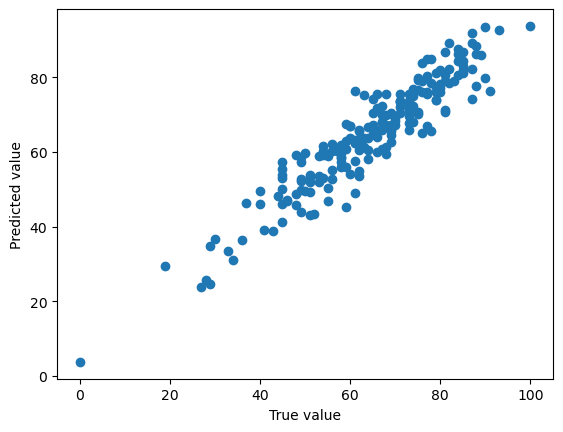

In [42]:
plt.scatter(y_test,y_predict)
plt.xlabel("True value")
plt.ylabel("Predicted value")

<Axes: xlabel='math_score'>

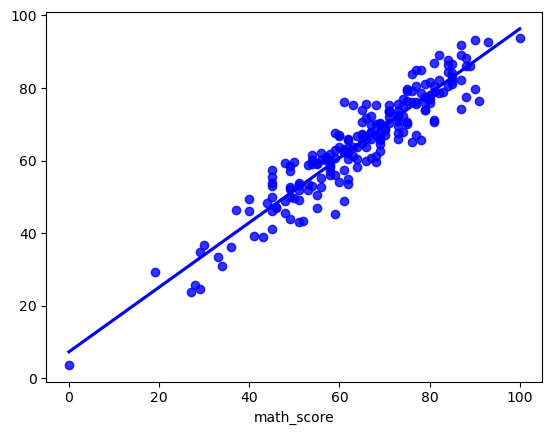

In [44]:
sns.regplot(x=y_test, y=y_predict,ci=None ,color='blue')

## Diffrence b/w actual and predict

In [45]:
pd.DataFrame({"Actual Val":y_test,"Predicted Val":y_predict, "Diffrence":y_test-y_predict})

,Actual Val,Predicted Val,Diffrence
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
